In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.models import Model

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, Activation, GlobalMaxPooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam

In [5]:
dataset_path = "C:/Users/jinka/Music/Projects/fresh and rotten/dataset"
print(os.listdir(dataset_path))

TRAIN_PATH = "C:/Users/jinka/Music/Projects/fresh and rotten/dataset/train"
TEST_PATH = "C:/Users/jinka/Music/Projects/fresh and rotten/dataset/test"
BATCH_SIZE = 32
EPOCHS = 5
LEARNING_RATE = 0.001
IMG_SHAPE= (224,224)

['dataset', 'test', 'train']


In [6]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                 zoom_range=0.2,
                                 shear_range=0.3,
                                 horizontal_flip=True,
                                 brightness_range=[0.5,1.5])

test_datagen = ImageDataGenerator(rescale=1/255.0)


train_gen = train_datagen.flow_from_directory(TRAIN_PATH,
                                            target_size=IMG_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="binary")

test_gen = test_datagen.flow_from_directory(TEST_PATH,
                                            target_size=IMG_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="binary")


classes_dict = dict(test_gen.class_indices)

classes_dict = {v: k for k,v in classes_dict.items()}
 
images, labels = next(train_gen)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


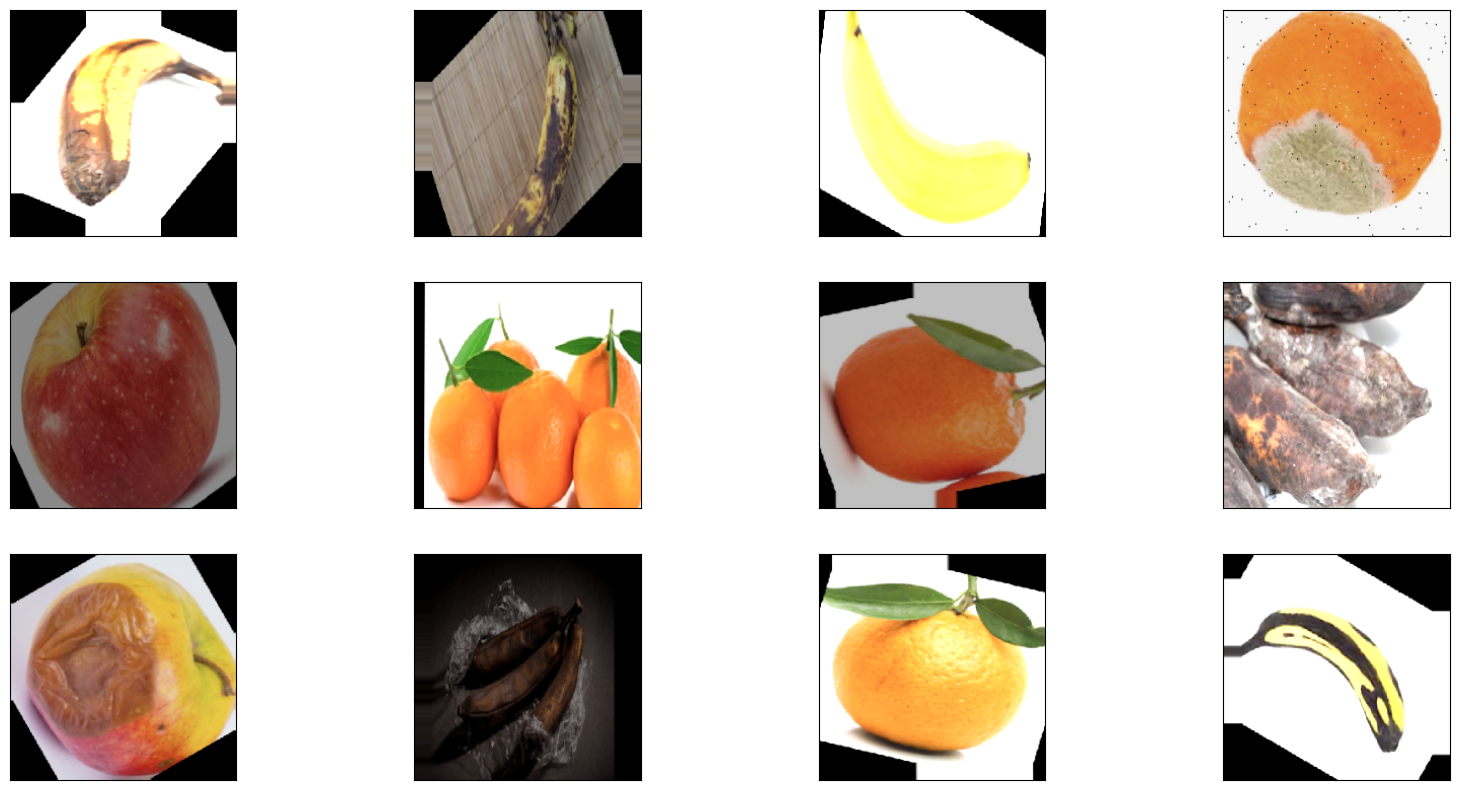

In [7]:
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [8]:
inception = InceptionV3(weights='imagenet',input_shape=(224, 224, 3),include_top=False)
 
inception.summary()

layers = inception.layers
print(f'Number of Layers: {len(layers)}')


TRAIN_SIZE = train_gen.samples
TEST_SIZE = test_gen.samples

callbacks = EarlyStopping(patience = 3, monitor='val_acc')
                        
 
inputs = inception.input

x = inception.output
x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

outputs = Dense(6, activation ='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

Number of Layers: 311


In [9]:
for layer in layers:
    layer.trainable = False



callbacks = [
    EarlyStopping(monitor='val_accuracy',  # Use 'val_accuracy' for accuracy monitoring
                  mode='max',               # Maximize accuracy
                  patience=5,              # Number of epochs with no improvement before stopping
                  verbose=1)
]


model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5


c:\Users\jinka\Downloads\python installation\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


340/340 ━━━━━━━━━━━━━━━━━━━━ 807s 2s/step - accuracy: 0.8267 - loss: 0.5378 - val_accuracy: 0.9665 - val_loss: 0.0940
Epoch 2/5
  1/340 ━━━━━━━━━━━━━━━━━━━━ 5:51 1s/step - accuracy: 0.9688 - loss: 0.1570

c:\Users\jinka\Downloads\python installation\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.1570 - val_accuracy: 1.0000 - val_loss: 0.0350
Epoch 3/5
340/340 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - accuracy: 0.9470 - loss: 0.1479 - val_accuracy: 0.9725 - val_loss: 0.0693
Epoch 4/5
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.0708 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 5/5
340/340 ━━━━━━━━━━━━━━━━━━━━ 579s 2s/step - accuracy: 0.9591 - loss: 0.1145 - val_accuracy: 0.9766 - val_loss: 0.0649
85/85 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9767 - loss: 0.0657
Validation Accuracy = 0.976649 
Validation Loss = 0.064772 


<Figure size 640x480 with 0 Axes>

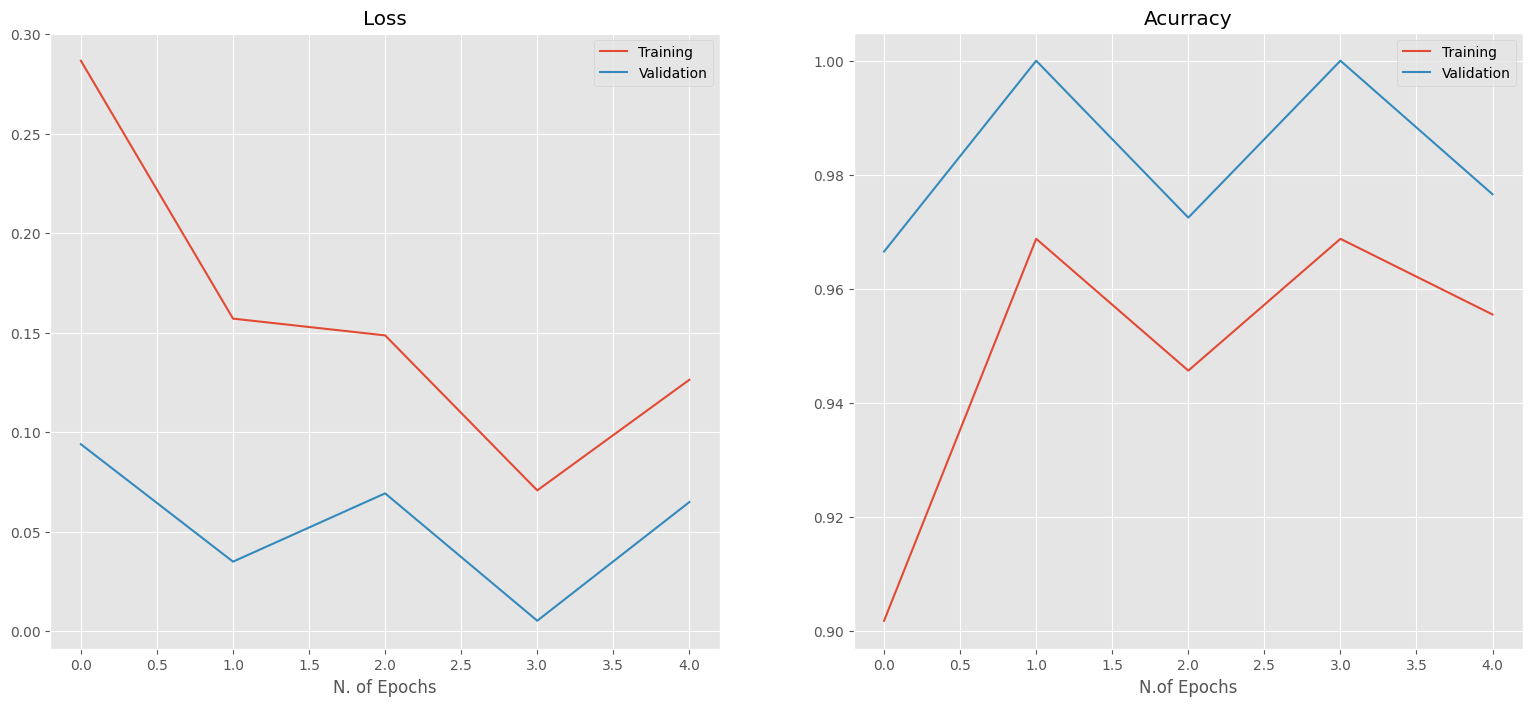

In [10]:
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=test_gen,
    validation_steps=TEST_SIZE // BATCH_SIZE,
    steps_per_epoch=TRAIN_SIZE // BATCH_SIZE,
    callbacks=callbacks
)


plt.style.use('ggplot')
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(19,8))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Training','Validation'])
ax1.set_title('Loss')
ax1.set_xlabel('N. of Epochs')
## plot training accuracy vs validation accuracy 
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['Training','Validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('N.of Epochs')


loss, test_acc = model.evaluate(test_gen)
print("Validation Accuracy = %f \nValidation Loss = %f " % (test_acc, loss))

85/85 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step


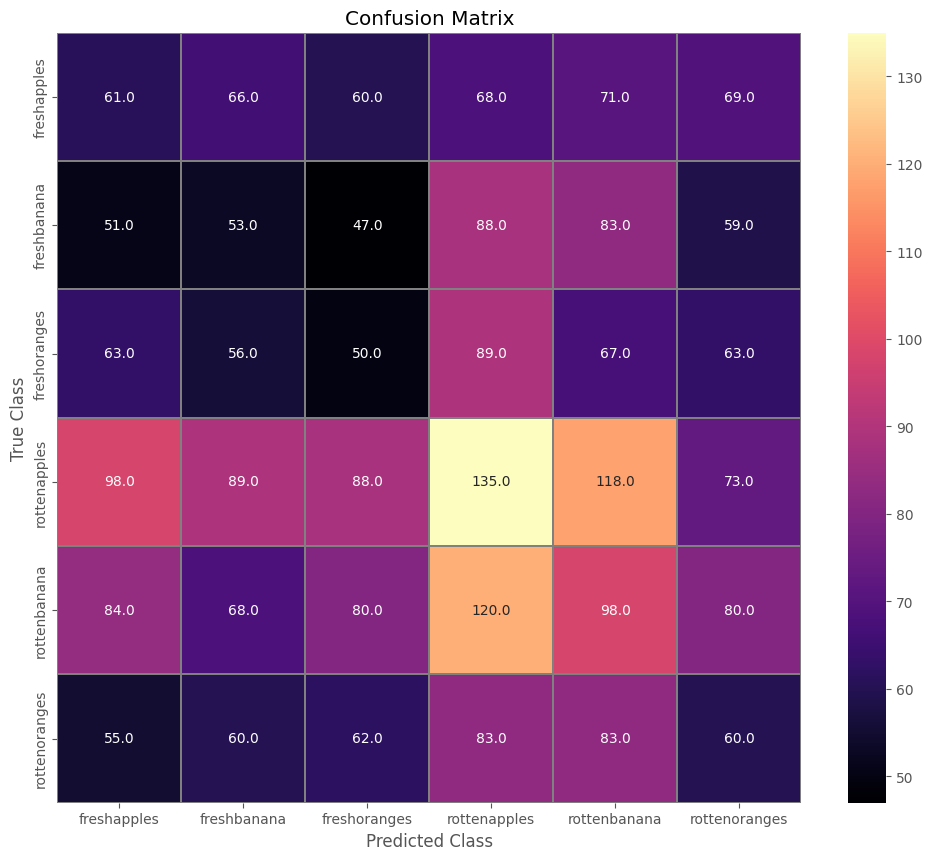

In [11]:
class_names = list(classes_dict.values())
labels = test_gen.classes
preds =  model.predict(test_gen)
predictions = np.argmax(preds, axis=1)
#show the confusion matrix 
conf_matrix = confusion_matrix(labels, predictions) 
# plot the confusion matrix
fig,ax = plt.subplots(figsize=(12, 10))
sb.heatmap(conf_matrix, annot=True, linewidths=0.01,cmap="magma",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
ax.set_xticklabels(labels = class_names,fontdict=None)
ax.set_yticklabels(labels = class_names,fontdict=None)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


C:\Users\jinka\AppData\Local\Temp\ipykernel_25332\2419495814.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted = int(np.argmax(model.predict(img), axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


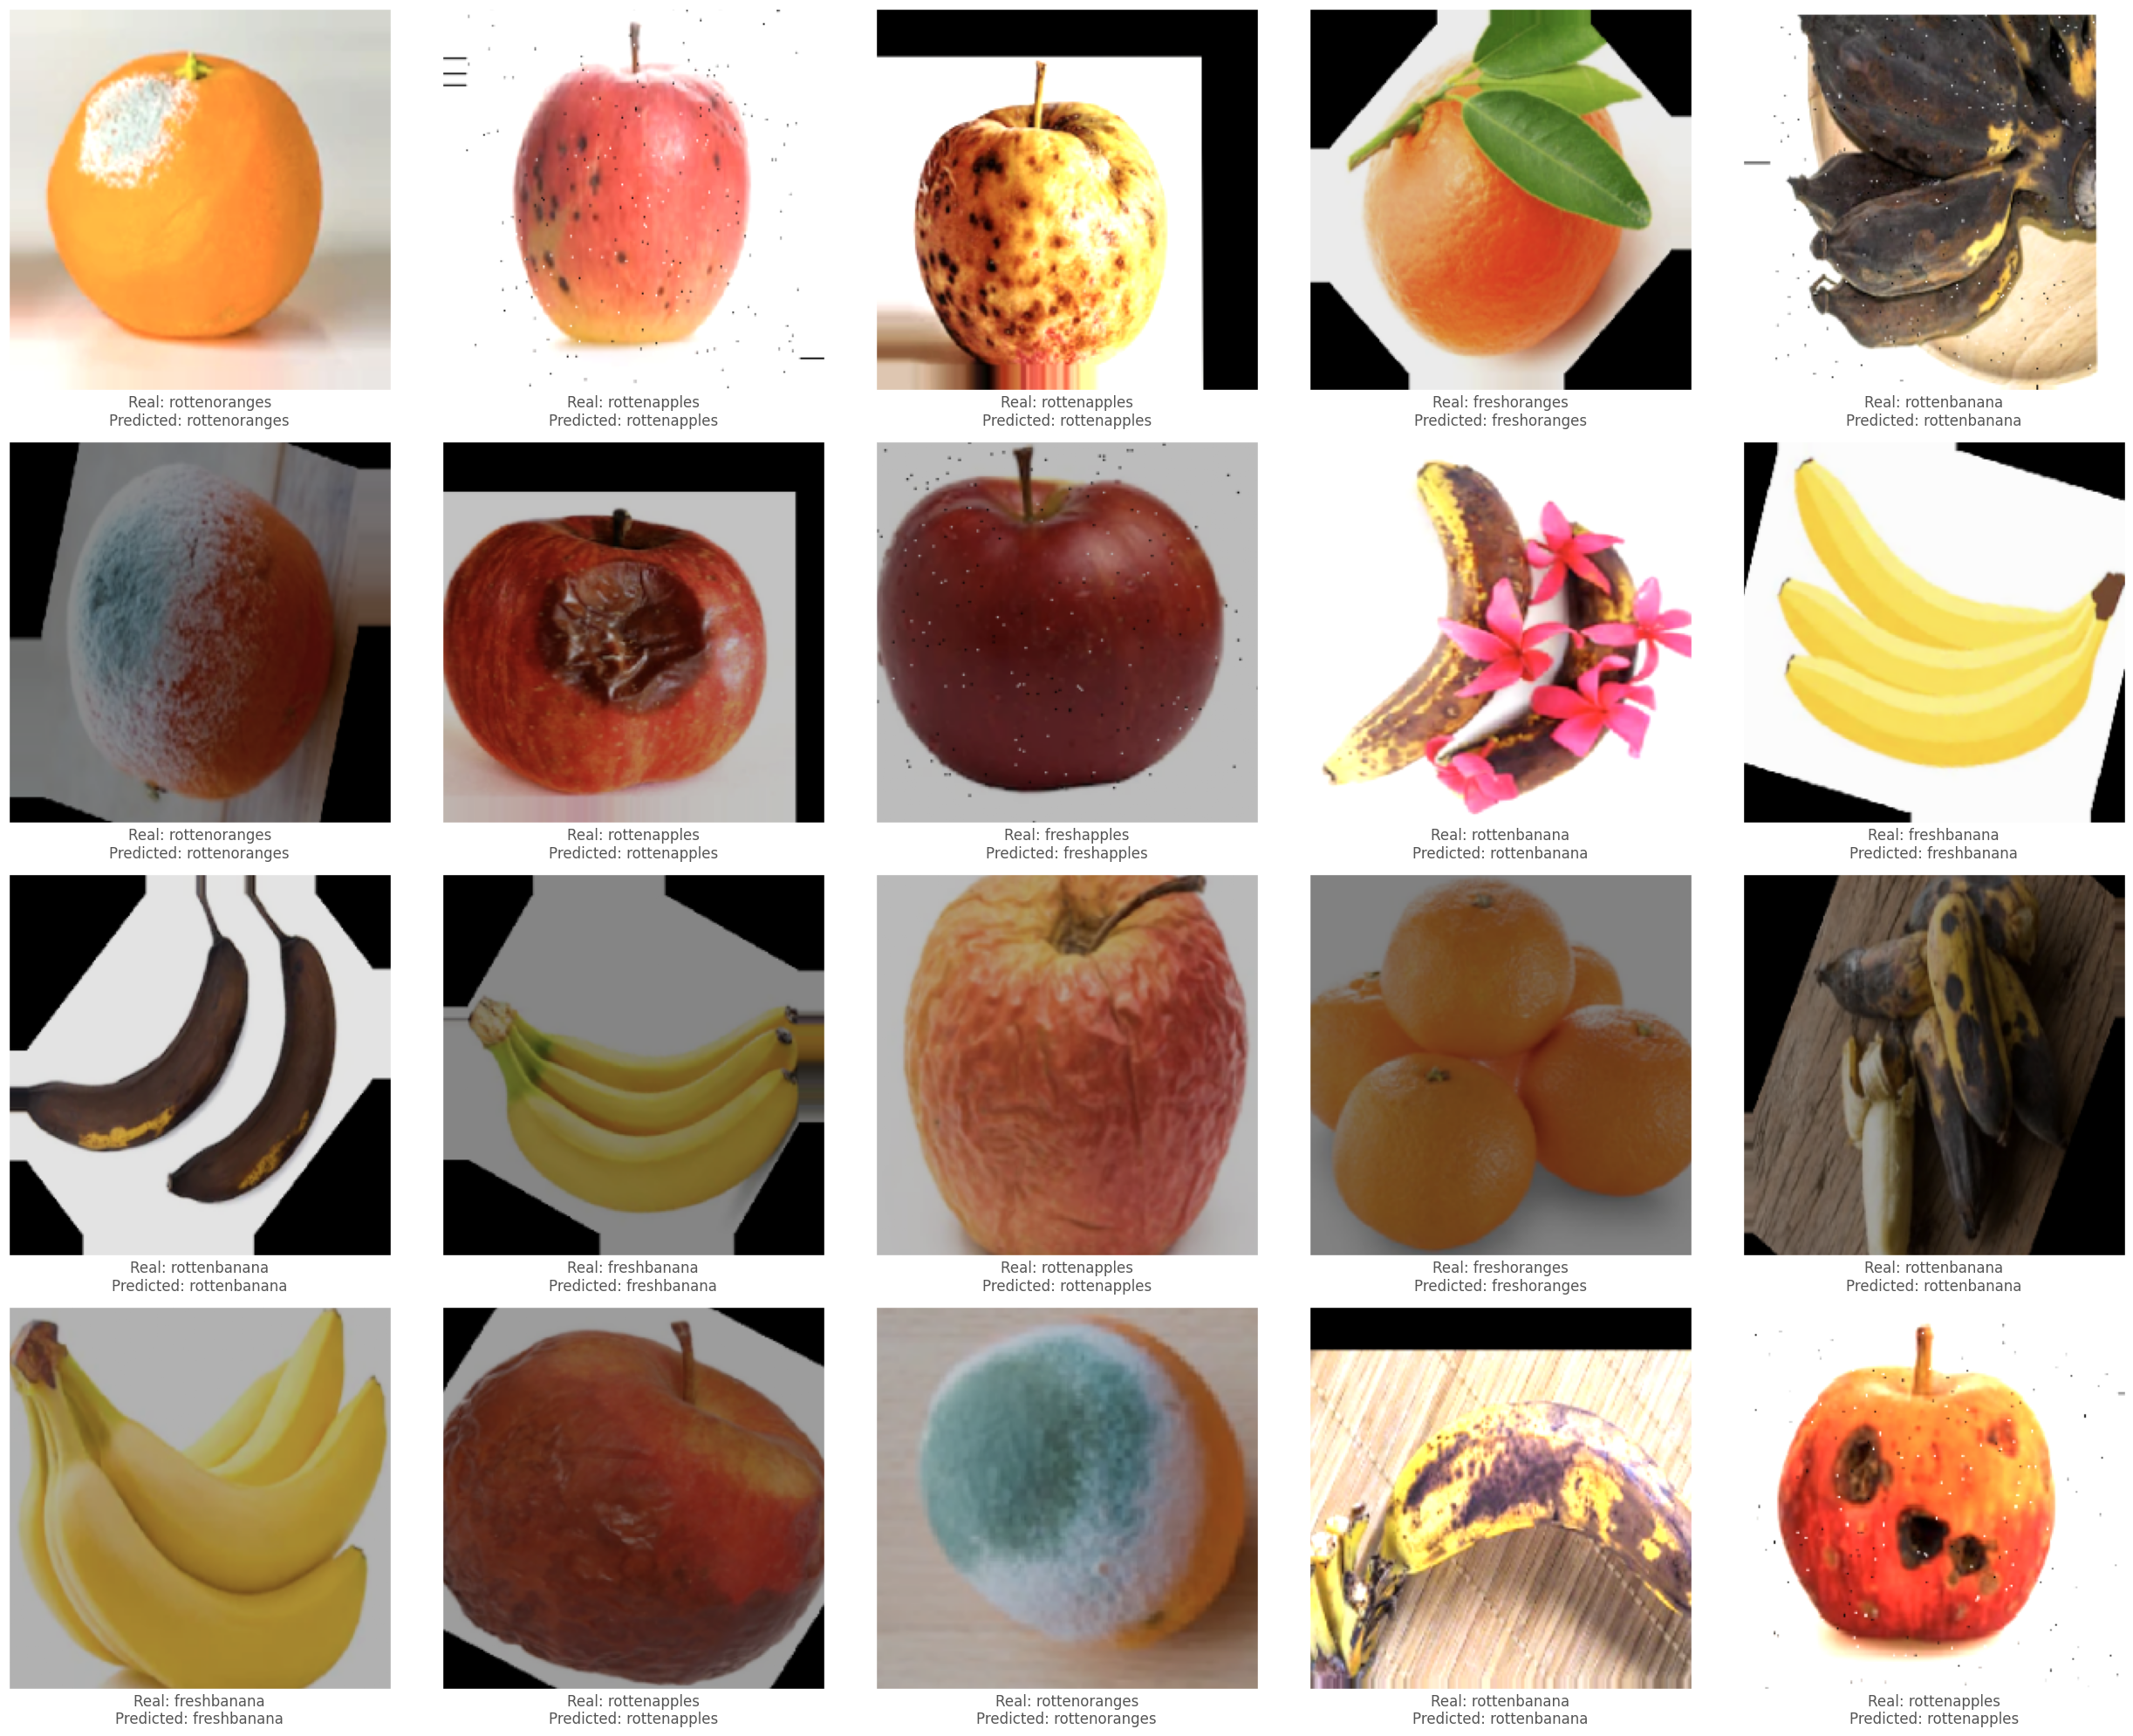

In [12]:
test_images, test_labels = next(train_gen)  
plt.figure(figsize=(25, 20))  

for i in range(20): 
    plt.subplot(4, 5, i + 1)  
    plt.imshow(test_images[i])  
    plt.xticks([])
    plt.yticks([])

    
    real = classes_dict[test_labels[i]]

    
    img = test_images[i].reshape(1, 224, 224, 3)
    
    
    predicted = int(np.argmax(model.predict(img), axis=1))
    predicted = classes_dict[predicted]

    
    plt.xlabel(f"Real: {real}\nPredicted: {predicted}")

plt.tight_layout()
plt.show()

In [13]:
# Save the trained model to HDF5 file
model.save("model.h5")
